# SpikeInterface v0.101.1 - Adapted by Rodrigo Noseda - October 2024

SpikeInterface to analyze a multichannel dataset from Cambridge Neurotech Probes. 
The dataset is extracted using open-ephys DAQ and Bonsai-rx (in .bin).
Event_timestamps need some work.

# 0. Preparation <a class="anchor" id="preparation"></a>

In [1]:
import spikeinterface.full as si
print(f"SpikeInterface Version: {si.__version__}")

SpikeInterface Version: 0.101.1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy.signal
from pathlib import Path
import os

#import spikeinterface_gui as sigui (imported with si.full?)
import warnings
warnings.simplefilter("ignore")
%matplotlib widget
#%matplotlib inline

# 1. Loading recording and probe information <a class="anchor" id="loading"></a>

In [3]:
# file paths
base_folder = Path('D:/Ephys_C2DRG/')
data_folder = Path("D:/Ephys_C2DRG/2023_9_19/")
#Pasted directly from explorer "C:\Users\rodri\Documents\Bonsai-RN\Bonsai_DataRN\2023_3_21\"

recording_paths_list = []
for filename in os.listdir(data_folder):
    if filename.startswith('RawEphysData') and filename.endswith('.bin'):
        recording_paths_list.append(data_folder / filename)

print('Recording Files List:')
print(recording_paths_list)
n_files = len(recording_paths_list)  
#Dinamically create 'recording_n' variables
for i in range(n_files):
    globals()[f'recording{i}'] = f"{recording_paths_list[i]}" 

# parameters associated to the bin format
num_channels = 64 #must know apriori; modify in probe below accordingly.
fs = 30000
gain_to_uV = 0.195
offset_to_uV = 0
#t_starts = 0
dtype = "float32"
time_axis = 0     

Recording Files List:
[WindowsPath('D:/Ephys_C2DRG/2023_9_19/RawEphysData_32Ch_ProbeF_Broken_0.bin'), WindowsPath('D:/Ephys_C2DRG/2023_9_19/RawEphysData_32Ch_ProbeF_Broken_1.bin')]


In [4]:
recordings_list = []
rec = si.read_binary(recording_paths_list, num_chan=num_channels,sampling_frequency=fs,
                           dtype=dtype, gain_to_uV=gain_to_uV, offset_to_uV=offset_to_uV, 
                           time_axis=time_axis, is_filtered=False)
recordings_list.append(rec)
print(recordings_list)

[BinaryRecordingExtractor: 64 channels - 30.0kHz - 2 segments - 200,128,800 samples 
                          6,670.96s (1.85 hours) - float32 dtype - 47.71 GiB
Segments:
Samples:   108,001,920 | 92,126,880
Durations: 3,600.06s (1.00 hours) | 3,070.90s (51.18 minutes)
Memory:    25.75 GiB | 21.96 GiB
  file_paths: ['D:\\Ephys_C2DRG\\2023_9_19\\RawEphysData_32Ch_ProbeF_Broken_0.bin', 'D:\\Ephys_C2DRG\\2023_9_19\\RawEphysData_32Ch_ProbeF_Broken_1.bin']]


In [5]:
import probeinterface as pi
from probeinterface.plotting import plot_probe
print(f"ProbeInterface version: {pi.__version__}")
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-158-H10'
#probe_name = 'ASSY-158-F'
#probe_name = 'ASSY-158-H6'

ProbeInterface version: 0.2.24


Run code below get the probe from library.

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64']
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


(<matplotlib.collections.PolyCollection at 0x1e78df75950>,
 <matplotlib.collections.PolyCollection at 0x1e78deeefd0>)

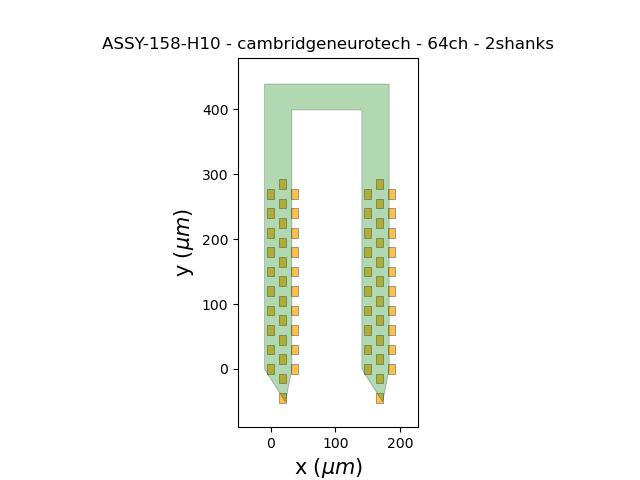

In [6]:
#probe object from library comes with contact and shank info.
probeH10 = pi.get_probe(manufacturer, probe_name)
print(probeH10.contact_ids)
print(probeH10.shank_ids)
plot_probe(probeH10)

[24 23 25 22 26 21 27 20 28 19 29 18 30 17 31 16  0 15  1 14  2 13  3 12
  4 11  5 10  6  9  7  8 56 55 57 54 58 53 59 52 60 51 61 50 62 49 63 48
 32 47 33 46 34 45 35 44 36 43 37 42 38 41 39 40]


(-60.0, 300.0)

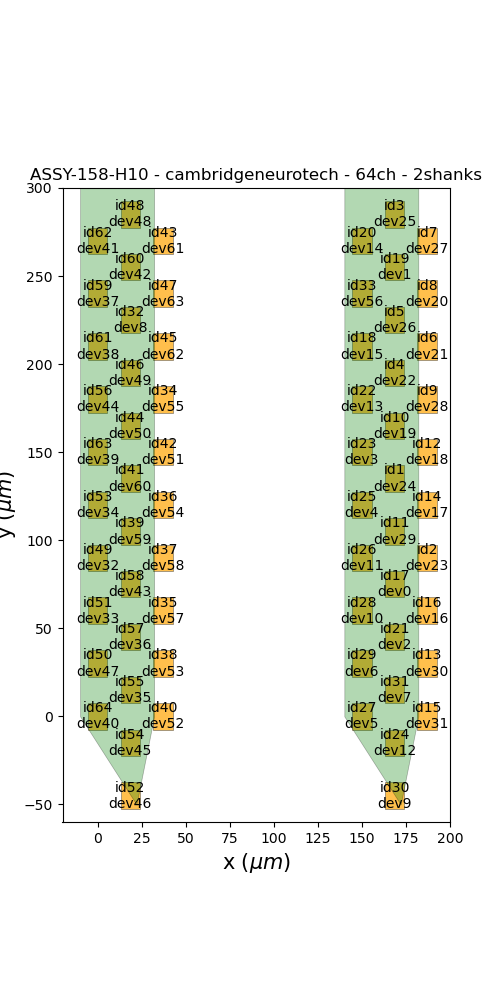

In [7]:
#Intan mapping 64 channels
device_channel_indices = [24,23,25,22,26,21,27,20,28,19,29,18,30,17,31,16,0,15,1,14,2,13,3,12,4,11,5,10,6,9,7,8,
                56,55,57,54,58,53,59,52,60,51,61,50,62,49,63,48,32,47,33,46,34,45,35,44,36,43,37,42,38,41,39,40] #Modify accordingly.
#                88,87,89,86,90,85,91,84,92,83,93,82,94,81,95,80,64,79,65,78,66,77,67,76,68,75,69,74,70,73,71,72,
#                120,119,121,118,122,117,123,116,124,115,125,114,126,113,127,112,96,111,97,110,98,109,99,108,100,107,101,106,102,105,103,104]

probeH10.set_device_channel_indices(device_channel_indices)
print(probeH10.device_channel_indices)
fig, ax = plt.subplots(figsize=(5, 10))
plot_probe(probeH10, ax=ax, with_contact_id=True, with_device_index=True,)
ax.set_xlim(-20, 200)
ax.set_ylim(-60, 300)

The probe now has contact ids `id#` and device ids `dev#`! Note that also the `shank_id` is loaded with the probe. We can also visualize the probe information as a `pandas` dataframe:


In [8]:
probeH10.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]
#probeF64.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]

,contact_ids,shank_ids,device_channel_indices
0,1,1,24
1,2,1,23
2,3,1,25
3,4,1,22
4,5,1,26
...,...,...,...
59,60,0,42
60,61,0,38
61,62,0,41
62,63,0,39


A probe (prb) or `probeinterface` object can be loaded directly to a SI recording object:
-In the case below, a group is formed from each shank - 'by_shank'

In [9]:
multirecording = si.concatenate_recordings(recordings_list)
recording_prb = multirecording.set_probe(probeH10, group_mode="by_shank")
print(multirecording)

ConcatenateSegmentRecording: 64 channels - 30.0kHz - 1 segments - 200,128,800 samples 
                             6,670.96s (1.85 hours) - float32 dtype - 47.71 GiB


In [10]:
A = recording_prb.get_channel_ids()
recording_slice = recording_prb.channel_slice(A[0:16])
w_ts = si.plot_timeseries(recording_slice, channel_ids=None, order_channel_by_depth=False,
                          time_range=(0, 0.25), backend='ipywidgets', show_channel_ids= True, clim=None)

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [11]:
si.plot_traces(recording_prb, mode='line', backend='ipywidgets',
               channel_ids=recording_prb.channel_ids[::16])


AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

After loading the probe we now have some new properties: `contact_vector`, `location`, and `group`.

# 2. Preprocessing <a class="anchor" id="preprocessing"></a>

All preprocessing modules return new `RecordingExtractor` objects that apply the underlying preprocessing function. This allows users to access the preprocessed data in the same way as the raw data. We will focus only on the first shank (group `0`) for now.

In [12]:
recordings_by_group = recording_prb.split_by("group")
recording_to_process = recordings_by_group[0]
recording_f = si.bandpass_filter(recording_to_process, freq_min=300, freq_max=6000)
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')
#recording_removeart = si.RemoveArtifactsRecording(recording_prb, list_triggers=triggers, ms_before=0.5, ms_after=3)
recording_to_process

ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 200,128,800 samples 
                       6,670.96s (1.85 hours) - float32 dtype - 23.86 GiB

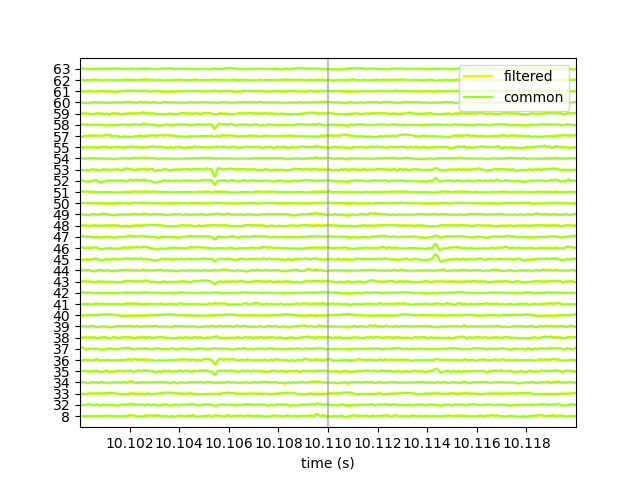

In [13]:
events = np.array([10.11, 10.17])
w = si.plot_traces({"filtered": recording_f, "common": recording_cmr}, mode='line',
                   show_channel_ids=True,events=events,
                   time_range=[10.1, 10.12])

In [14]:
bad_channel_ids, channel_labels = si.detect_bad_channels(recording_cmr, method='coherence+psd')
print('bad_channel_ids', bad_channel_ids)
print('channel_labels', channel_labels)

bad_channel_ids [35 40 41 44 45 53 55 58 61]
channel_labels ['good' 'good' 'good' 'good' 'dead' 'good' 'good' 'good' 'good' 'dead'
 'dead' 'good' 'good' 'noise' 'dead' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'dead' 'good' 'noise' 'good' 'dead' 'good' 'good' 'dead'
 'good' 'good']


## Take only 5 min. for demo

Since we are going to spike sort the data, let's first cut out a 5-minute recording, to speed up computations.

We can easily do so with the `frame_slice()` function:

In [15]:
recording_sub = recording_cmr.frame_slice(start_frame=0*fs, end_frame=300*fs)
print(recording_sub)

FrameSliceRecording: 32 channels - 30.0kHz - 1 segments - 9,000,000 samples 
                     300.00s (5.00 minutes) - float32 dtype - 1.07 GiB


# 3. Saving and loading SpikeInterface objects <a class="anchor" id="save-load"></a>

All operations in SpikeInterface are *lazy*, meaning that they are not performed if not needed. This is why the creation of our filter recording was almost instantaneous. However, to speed up further processing, we might want to **save** it to a file and perform those operations (eg. filters, CMR, etc.) at once. 

Note: you can use the si.set_global_job_kwargs() to set job_kwargs globally for the entire session!

In [16]:
n_cpus = os.cpu_count()
n_jobs = n_cpus - 2 #n_jobs = -1 :equal to the number of cores.
job_kwargs = dict(n_jobs=n_jobs, chunk_duration="1s", progress_bar=True)
#global_job_kwargs = dict(n_jobs=n_jobs, chunk_duration="1s", progress_bar=True)
#si.set_global_job_kwargs(global_job_kwargs)

In [17]:
if (data_folder / "preprocessed").is_dir():
    recording_saved = si.load_extractor(data_folder / "preprocessed")
else:
    recording_saved = recording_cmr.save(folder=data_folder / "preprocessed", **job_kwargs)
    
print(recording_saved)
print(f'Cached channels ids:\n {recording_saved.get_channel_ids()}')
print(f'Channel groups after caching:\n {recording_saved.get_channel_groups()}')

BinaryFolderRecording: 32 channels - 30.0kHz - 1 segments - 9,000,000 samples 
                       300.00s (5.00 minutes) - float32 dtype - 1.07 GiB
Cached channels ids:
 [ 8 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 57 58 59 60 61 62 63]
Channel groups after caching:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


The `traces_cached_seg0.raw` contains the processed raw data, while the `.json` files include information on how to reload the binary file. The `provenance.json` includes the information of the recording before saving it to a binary file, and the `probe.json` represents the probe object. The `save` returns a new *cached* recording that has all the previously loaded information: 

After saving the SI object, we can easily load it back in a new session:

In [18]:
recording_loaded = si.load_extractor(data_folder/"preprocessed")
print(f'Loaded channels ids: {recording_loaded.get_channel_ids()}')
print(f'Channel groups after loading: {recording_loaded.get_channel_groups()}')

Loaded channels ids: [ 8 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 57 58 59 60 61 62 63]
Channel groups after loading: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We can double check that the traces are exactly the same as the `recording_saved` that we saved:

Text(0.5, 1.0, 'Loaded')

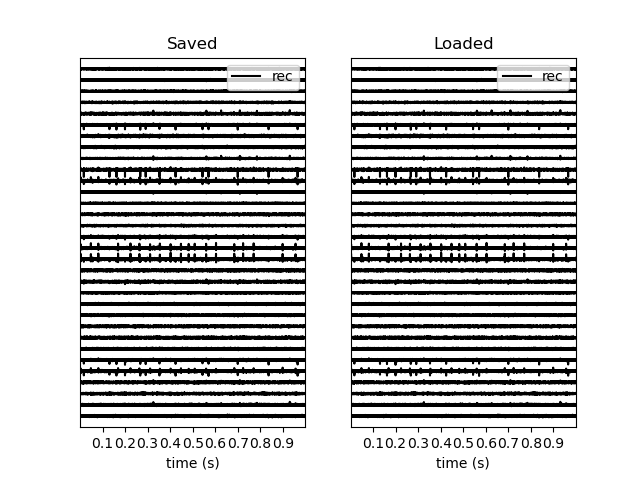

In [19]:
fig, axs = plt.subplots(ncols=2)
w_saved = si.plot_timeseries(recording_saved, ax=axs[0])
w_loaded = si.plot_timeseries(recording_loaded, ax=axs[1])
axs[0].set_title("Saved")
axs[1].set_title("Loaded")

**IMPORTANT**: the same saving mechanisms are available also for all SortingExtractor

# 5. Spike sorting <a class="anchor" id="spike-sorting"></a>

We can now run spike sorting on the above recording. We will use different spike sorters for this demonstration, to show how easy SpikeInterface makes it easy to interchengably run different sorters :)

Let's first check the installed sorters in `SpikeInterface` to see if `tridesclous` is available. Then we can then check the `tridesclous` default parameters.
We will sort the bandpass cached filtered recording the `recording_saved` object.

In [20]:
si.installed_sorters()

['simple', 'spykingcircus2', 'tridesclous', 'tridesclous2']

In [21]:
from pprint import pprint
default_KS4_params = si.get_default_sorter_params('kilosort4')
# Parameters can be changed by single arguments: 
#default_KS4_params['Th_universal'] = 9
#sorter_params = {'do_correction': False} #??
pprint(default_KS4_params)

{'Th_learned': 8,
 'Th_single_ch': 6,
 'Th_universal': 9,
 'acg_threshold': 0.2,
 'artifact_threshold': None,
 'bad_channels': None,
 'batch_size': 60000,
 'binning_depth': 5,
 'ccg_threshold': 0.25,
 'clear_cache': False,
 'cluster_downsampling': 20,
 'cluster_pcs': 64,
 'delete_recording_dat': True,
 'dmin': None,
 'dminx': 32,
 'do_CAR': True,
 'do_correction': True,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'duplicate_spike_ms': 0.25,
 'highpass_cutoff': 300,
 'invert_sign': False,
 'keep_good_only': False,
 'max_channel_distance': None,
 'min_template_size': 10,
 'n_pcs': 6,
 'n_templates': 6,
 'nblocks': 1,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'nskip': 25,
 'nt': 61,
 'nt0min': None,
 'save_extra_vars': False,
 'save_preprocessed_copy': False,
 'scale': None,
 'scaleproc': None,
 'shift': None,
 'sig_interp': 20,
 'skip_kilosort_preprocessing': False,
 'template_sizes': 5,
 'templates_from_data': True,
 'torch_device': 'auto',
 'use_binary_file': None,
 'whitening_range'

In [22]:
si.run_sorter?

Signature:
si.run_sorter(
    sorter_name: 'str',
    recording: 'BaseRecording',
    folder: 'Optional[str]' = None,
    remove_existing_folder: 'bool' = False,
    delete_output_folder: 'bool' = False,
    verbose: 'bool' = False,
    raise_error: 'bool' = True,
    docker_image: 'Optional[Union[bool, str]]' = False,
    singularity_image: 'Optional[Union[bool, str]]' = False,
    delete_container_files: 'bool' = True,
    with_output: 'bool' = True,
    output_folder: 'None' = None,
    **sorter_params,
)
Docstring:
Generic function to run a sorter via function approach.


Parameters
----------
sorter_name : str
    The sorter name
recording : RecordingExtractor
    The recording extractor to be spike sorted
folder : str or Path
    Path to output folder
remove_existing_folder : bool
    If True and folder exists then delete.
delete_output_folder : bool, default: False
    If True, output folder is deleted
verbose : bool, default: False
    If True, output is verbose
raise_error : b

In [23]:
# run spike sorting on recording
#sorter_params = {'do_correction': False}
sorting_KS4 = si.run_sorter('kilosort4', recording_sub, 
                            output_folder=data_folder / 'results_KS4',
                            docker_image=True, verbose=True)#, **sorter_params, **job_kwargs)

installation_mode='auto' switching to installation_mode: 'github'
Starting container
Installing spikeinterface with github in container
Running kilosort4 sorter inside spikeinterface/kilosort4-base
Stopping container


In [24]:
sorting_KS4

NumpyFolder: 16 units - 1 segments - 30.0kHz

In [25]:
sorting_saved_KS4 = sorting_KS4.save(folder=data_folder / "sorting_KS4")

AssertionError: folder D:\Ephys_C2DRG\2023_9_19\sorting_KS4 already exists, choose another name or use overwrite=True

In [ ]:
sorting_loaded_KS4 = si.load_extractor(data_folder / "sorting_KS4")
sorting_loaded_KS4
#sorting_KS4 = si.read_sorter_folder(data_folder/"results_KS4")

We can use `spikewidgets` functions for some quick visualizations:

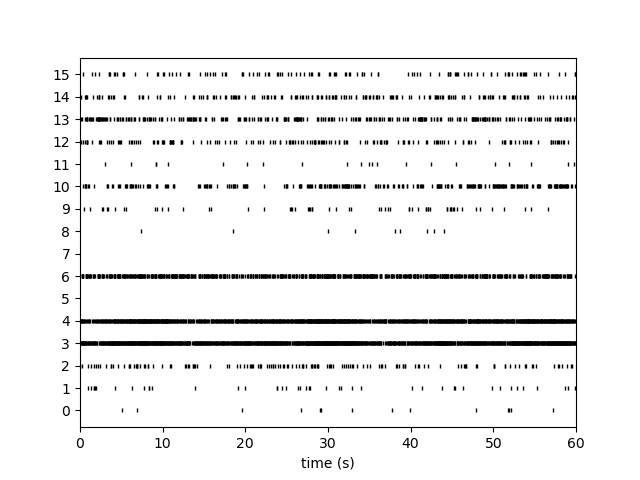

In [26]:
w_rs = si.plot_rasters(sorting_KS4, time_range=(0, 60), backend='matplotlib')

# 6. SortingAnalyzer <a class="anchor" id="sortinganalyzer"></a>

The core module uses `SortingAnalyzer` for postprocessing computation from paired recording-sorting objects. It retrieves waveforms, templates, spike amplitudes, etc.

In [ ]:
si.create_sorting_analyzer?

In [27]:
sa = si.create_sorting_analyzer(sorting_KS4, recording_sub, folder=data_folder / "sorting_analyzer_3m", 
                              format="binary_folder", sparse=True, overwrite=True, **job_kwargs)

estimate_sparsity:   0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
#Saving Analyzer in specific format and loading it from saved
#sa.save_as(format="zarr",folder=data_folder / "sorting_analyzer_3m")
#sa_bin = si.load_sorting_analyzer(folder=data_folder / "sorting_analyzer_3m")
#sa_zarr = si.load_sorting_analyzer(folder=data_folder / "sorting_analyzer_3m.zarr")

# 7. Postprocessing <a class="anchor" id="postprocessing"></a>

### Computing Extensions: PCA, waveforms, templates, spike amplitude, correlograms, etc.

Let's move on to explore the postprocessing capabilities of the `postprocessing` module. Similarly to the `SortingAnalizer` object, the method 'compute` retrieve info on demand.

In [ ]:
all_computable_extensions = sa.get_computable_extensions()
print(all_computable_extensions)

In [ ]:
#each call will recompute and overwrite previous computations
sa.compute("random_spikes")#subsample to create a template
wf = sa.compute("waveforms", ms_before=1.5, ms_after=2.5)
sa.compute("templates")#from raw waveforms or random_spikes
sa.compute("spike_amplitudes", peak_sign="neg")#based on templates
sa.compute("noise_levels")#per channel
sa.compute("principal_components", n_components=3, mode="by_channel_local")
sa.compute("correlograms", window_ms=50.0, bin_ms=1.0, method="auto")
sa.compute("isi_histograms", window_ms=50.0, bin_ms=1.0, method="auto")
sa.compute("spike_locations")#need for drift metrics (drift_ptp, drift_std, drift_mad)
sa.compute("unit_locations", "template_metrics", "quality_metrics")

Extensions are generally saved in two ways: 

sorting_analyzer = create_sorting_analyzer(sorting=sorting, recording=recording, format="memory")

sorting_analyzer.save_as(folder="my_sorting_analyzer")
sorting_analyzer.compute("random_spikes", save=True)

Here the random_spikes extension is not saved. The sorting_analyzer is still saved in memory. The save_as method only made a snapshot of the sorting analyzer which is saved in a folder. This is useful when trying out different parameters and initially setting up your pipeline. If we wanted to save the extension we should have started with a non-memory sorting analyzer:

sorting_analyzer = create_sorting_analyzer(sorting=sorting, recording=recording, format="binary_folder", folder="my_sorting_analyzer")
sorting_analyzer.compute("random_spikes", save=True)

NOTE: We recommend choosing a workflow and sticking with it. Either keep everything on disk or keep everything in memory until you’d like to save. A mixture can lead to unexpected behavior.

# 8. Quality Metrics <a class="anchor" id="qualitymetrics"></a>

#### Metrics for Spikes

In [ ]:
#Amplitud cutoff (calculate the approximate fraction of missing spikes)
#Need "spike_amplitudes"
fraction_missing = si.compute_amplitude_cutoffs(sa, peak_sign="neg")

#Amplitud CV (coefficient of variation)
#Need "spike_amplitudes" or "amplitude_scalings" pre-computed.
amplitude_cv_median, amplitude_cv_range = si.compute_amplitude_cv_metrics(sa)
#dicts: unit ids as keys, and amplitude_cv metrics as values.

#Drift metrics
#Need "spike_locations"
drift_ptps, drift_stds, drift_mads = si.compute_drift_metrics(sa)
#dicts: unit ids as keys, and drifts metrics as values.

#Firing Range (outside of physiological range, might indicate noise contamination)
firing_range = si.compute_firing_ranges(sa)
#dict: unit IDs as keys, firing_range as values (in Hz).

#Firing Rate (average number of spikes/sec within the recording)
firing_rate = si.compute_firing_rates(sa)
#dict or floats: unit IDs as keys, firing rates across segments as values (in Hz).

#Inter-spike-interval (ISI) Violations (rate of refractory period violations)
isi_violations_ratio, isi_violations_count = si.compute_isi_violations(sa, isi_threshold_ms=1.0) 
#dicts: unit ids as keys, and isi ratio viol and number of viol as values.

#Presence Ratio (proportion of discrete time bins in which at least one spike occurred)
presence_ratio = si.compute_presence_ratios(sa)
#dict: unit IDs as keys, presence ratio (between 0 and 1) as values.
#Close or > 0.9 = complete units.
#Close to 0 = incompleteness (type II error) or highly selective firing pattern.

#Standard Deviation (SD) ratio
sd_ratio = si.compute_sd_ratio(sa, censored_period_ms=4.0)
#Close to 1 = unit from single neuron.

#Signal-to-noise ratio (SNR)
SNRs = si.compute_snrs(sa)
#dict: unit IDs as keys and their SNRs as values.
#High SNR = likely to correspond to a neuron. Low SNR = unit contaminated.

#Synchrony Metrics (characterize synchronous events within the same spike train and across different spike trains)
synchrony = si.compute_synchrony_metrics(sa, synchrony_sizes=(2, 4, 8))
#tuple of dicts with the synchrony metrics for each unit.

#### Metrics for Clusters

In [ ]:
#Isolation Distance (distance from a cluster to the nearest other cluster)
iso_distance = si.pca_metrics.mahalanobis_metrics(all_pcs=all_pcs, all_labels=all_labels, this_unit_id=0)
#returns floats: iso_distance, l_ratio.

#Nearest Neighbor Metrics (evaluate unit quality)
si.pca_metrics.nearest_neighbors_metrics(all_pcs, all_labels, this_unit_id, max_spikes, n_neighbors)
#Calculate unit contamination based on NearestNeighbors search in PCA space.
si.pca_metrics.nearest_neighbors_isolation(sa)
#Calculate unit isolation based on NearestNeighbors search in PCA space.
si.pca_metrics.nearest_neighbors_noise_overlap(sa)
#Calculate unit noise overlap based on NearestNeighbors search in PCA space.

#D-prime (estimate the classification accuracy between two units)
d_prime = si.lda_metrics(all_pcs=all_pcs, all_labels=all_labels, this_unit_id=0)
#returns a float (larger in well separated clusters)

#Silhouette score (ratio between the cohesiveness of a cluster and its separation from other clusters)
simple_sil_score = si.simplified_silhouette_score(all_pcs=all_pcs, all_labels=all_labels, this_unit_id=0)
#Close to 1 = good clustering. Close to -1 = poorly isolated cluster.



A straightforward way to filter a pandas dataframe is via the `query`.
We first define our query (make sure the names match the column names of the dataframe):

In [ ]:
our_query = f"amplitude_cutoff < {amp_cutoff_thresh} & isi_violations_ratio < {isi_viol_thresh}"
print(our_query)

and then we can use the query to select units:

In [ ]:
keep_units = qm.query(our_query)
keep_unit_ids = keep_units.index.values

In [ ]:
sorting_auto = sorting_SC2.select_units(keep_unit_ids)
print(f"Number of units before curation: {len(sorting_SC2.get_unit_ids())}")
print(f"Number of units after curation: {len(sorting_auto.get_unit_ids())}")

# 9. Viewers <a class="anchor" id="viewers"></a>

Let's check put the `spikeinterface-gui` to explore our spike sorting results:

### SpikeInterface GUI

In [ ]:
!sigui waveforms

In [ ]:
from ipywidgets import widgets
sw.plot_unit_locations(we_all, backend="ipywidgets")
sw.plot_spike_locations(we_all, backend="ipywidgets")
sw.plot_amplitudes(we_all, backend="ipywidgets")
sw.plot_autocorrelograms(we_all, unit_ids=sorting_SC2.unit_ids[:4])
sw.plot_crosscorrelograms(we_all, unit_ids=sorting_SC2.unit_ids[:4])
sw.plot_unit_templates(we_all, backend="matplotlib")

### Sorting Summary - SortingView

The `sortingview` backend requires an additional step to configure the transfer of the data to be plotted to the cloud. 

See documentation [here](https://spikeinterface.readthedocs.io/en/latest/module_widgets.html): 

# 11. Exporters <a class="anchor" id="exporters"></a>

## Export to Phy for manual curation

To perform manual curation we can export the data to [Phy](https://github.com/cortex-lab/phy). 

In [ ]:
sexp.export_to_phy(we_all, output_folder=base_folder / 'phy_SC2_RN', compute_pc_features=True,
                   copy_binary=True, dtype='float32', compute_amplitudes=True, template_mode='median', verbose=True,**job_kwargs)

In [ ]:
#sexp.export_to_phy(we_all, output_folder=base_folder / 'phy_SC2c', 
#                   **job_kwargs)

In [ ]:
#%%capture --no-display
!phy template-gui phy_SC2_RN/params.py

After curating the results we can reload it using the `PhySortingExtractor` and exclude the units that we labeled as `noise`:

In [ ]:
sorting_phy_curated = se.PhySortingExtractor(base_folder / 'phy_SC2_RN/', exclude_cluster_groups=['noise'])

In [ ]:
print(f"Number of units before curation: {len(sorting_SC2.get_unit_ids())}")
print(f"Number of units after curation: {len(sorting_phy_curated.get_unit_ids())}")